In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def initCond(x):
  return np.exp(-1000*(x - 0.1*L)**2)
 
def breakw(x,a,b,db):
  d = d0 + np.zeros_like(x)
  for i, xi in enumerate(x):
    if xi>= a and xi<=b:
      d[i] = db
  return d
 
#physical settings
g = 9.8
d0 = 1
a = 3
b = 5
db = 0.75
L = 10
timeMax = 2
 
#discretization
dx = 0.005
dt = dx/np.sqrt(g*d0)
 
Nx = int(L/dx)
Nt = int(timeMax/dt)
 
x = np.linspace(0,L, Nx+1)
t = np.linspace(0, timeMax, Nt)
 
 
#memory allocation
eta = np.zeros((Nt,Nx+1))
u = np.zeros((Nt,Nx+1))
 
#initial condition
eta[0,:] = initCond(x)
u[0,:] = np.sqrt(g/d0)*eta[0,:]

In [ ]:
d = breakw(x,a,b,db)

In [ ]:
for n in range(Nt-1):
  for j in range(1, Nx):
    eta[n+1, j] = 0.5*(eta[n, j+1] + eta[n, j-1]) - (0.5*dt/dx*(d[j+1]*u[n, j+1] - d[j-1]*u[n, j-1]))
    u[n+1, j] = 0.5*(u[n, j+1] + u[n, j-1]) - (0.5*g*dt/dx*(eta[n, j+1] - eta[n, j-1]))

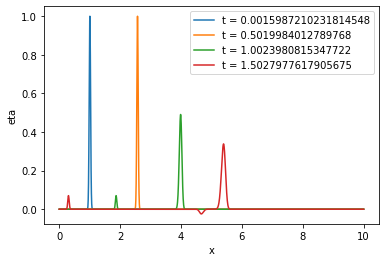

In [ ]:
indexes = np.arange(1, Nt, Nt/4).astype(int)
for n in indexes:
  plt.plot(x, eta[n,:], label='t = '+str(t[n]))
  plt.xlabel('x')
  plt.ylabel('eta')
  plt.legend()

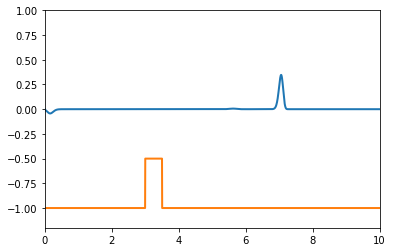

In [ ]:
fig, ax = plt.subplots()
 
ax.set_xlim(( 0,L))
ax.set_ylim((-1.2, 1))
 
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
 
def init():
    line.set_data([], [])
    return (line,)
 
def animate(n):
  line.set_data(x, eta[n,:])
  line2.set_data(x, -d)
  return (line,)
 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=60, blit=True)
HTML(anim.to_html5_video())

In [ ]:
def get_data(var, x):
  loc = int(x/dx)
  varp = var[:, loc]
  return varp

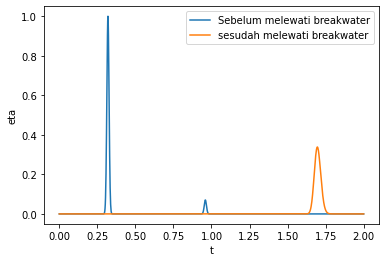

In [ ]:
eta2 = get_data(eta, 2)
eta6 = get_data(eta, 6)

plt.plot(t, eta2 ,label = 'Sebelum melewati breakwater')
plt.plot(t, eta6, label = 'sesudah melewati breakwater')
plt.xlabel('t')
plt.ylabel('eta')
plt.legend()

In [ ]:
print(max(eta6))

0.33835578544470063


In [ ]:
tt = np.arange(0,len(eta2),1)

Lets start from ...